# Machine Learning Insurance Classification Final Project


##### **Authors:** Weronika Mądro, Zahra Eshtiaghi

## Goal

The objective of this project is to build a machine learning classification model to predict the claim for insurance data. The following steps has been done: 

1. **Data Loading and Cleaning:** Imported the insurance dataset and performed initial cleaning to handle eventual missing values, correct data types, and ensure data quality.
2. **Exploratory Data Analysis (EDA):** Investigated distributions and relationships using visualizations and applied statistical tests to uncover significant patterns and correlations.
3. **Feature Engineering:** Created new variables and applied advanced encoding techniques to transform categorical features into meaningful numerical representations.
4. **Model Building and Evaluation:** Developed three models (Logistic Regression, KNN, SVM) to classify claims and evaluated its performance using appropriate metrics.
5. **Cross-Validation:** Applied cross-validation technique to assess the model’s stability and ensure it generalizes well to unseen data.
6. **Predictions:** Used the best model to generate predictions for all observations in the test dataset, enabling performance assessment on unseen data.



## Loading the libraries and the input data

The initial phase involves importing the required libraries that support data processing, exploratory analysis and model development.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE



We load the insurance_train and insurance_test csv files and store them in DataFrame objects named train and test.

In [7]:
train = pd.read_csv("insurance_train.csv")
test = pd.read_csv("insurance_test.csv")

## Dataset investigation

In this step, we begin by printing the number of observations and columns. This provides a quick overview of the dataset’s size, helping us understand how many data rows and features we are working with. We use train.head(5) to display the first five rows of the dataset.

In [11]:
print(f"Number of observations: {len(train)}")
print(f"Number of columns: {len(train.columns)}")
train.head(5)

Number of observations: 56993
Number of columns: 14


,reward,claim_status,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.284509,50b3e71e,51,united states,105.459587,SecurePlan Flex,21
1,18.428627,0,9b2d5b46,type_a,web,0,agt_0001,0.207538,96d6c6df,32,spain,30.433459,DriveSafe Rental Addon,6
2,0.000000,0,9b2d5b46,type_a,web,1,agt_0004,0.300461,50b3e71e,38,new zealand,78.728474,TripGuard Cancel,84
3,0.000000,0,9b2d5b46,type_a,web,0,agt_0004,0.132404,50b3e71e,30,thailand,17.146843,TripGuard Cancel,39
4,0.000000,0,9b2d5b46,type_a,web,2,agt_0004,0.070443,50b3e71e,37,viet nam,10.476416,TripGuard Cancel,48


This output indicates that the training dataset contains 56 993 observations (rows) and 14 columns (features).

Later on we want to provide a concise summary of the training dataset.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56993 entries, 0 to 56992
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                56993 non-null  float64
 1   claim_status          56993 non-null  int64  
 2   person_gender         56993 non-null  object 
 3   entity_type           56993 non-null  object 
 4   channel               56993 non-null  object 
 5   support_interactions  56993 non-null  int64  
 6   agent_id              56993 non-null  object 
 7   customer_score        56993 non-null  float64
 8   entity_a              56993 non-null  object 
 9   person_age            56993 non-null  int64  
 10  location              56993 non-null  object 
 11  revenue               56993 non-null  float64
 12  product_id            56993 non-null  object 
 13  trip_length           56993 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 6.1+ MB


The data types include:

* 3 columns with float64 values, typically representing continuous numerical data.
* 4 columns with int64 values, representing discrete numerical data such as counts or categorical codes.
* 7 columns with object dtype, which usually indicates categorical or text-based variables.

Let’s take a closer look at what each column in the dataset represents:
* reward - the monetary payout amount for each claim
* claim_status - binary target indicating whether a claim was made (1) or not (0)
* person_gender - the insured individual’s gender category 
* entity_type - classification of the policyholder
* channel - the sales or service channel through which the policy was sold or the claim was filed 
* support_interactions - number of customer-support touchpoints associated with the policy
* agent_id - unique identifier for the insurance agent managing this policy
* customer_score - a precomputed score reflecting the customer’s risk profile or satisfaction level
* entity_a - secondary entity code 
* person_age - age of the insured individual, in years
* location - geographic region or country associated with the policy
* revenue - total premium revenue paid for the policy
* product_id - identifier for the specific insurance product purchased
* trip_length - duration of coverage in days

As a next step, we check the statistical summary of the numerical features. This allows us to get a quick overview of each numeric column by examining key statistics such as the mean, standard deviation, minimum and maximum values, as well as the 25th, 50th (median), and 75th percentiles. 

In [13]:
train.describe()

,reward,claim_status,support_interactions,customer_score,person_age,revenue,trip_length
count,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000,56993.000000
mean,9.794976,0.014633,1.093941,0.189540,39.697261,40.750070,49.234888
std,19.791119,0.120081,0.923113,0.080641,12.603433,48.749221,98.659469
min,0.000000,0.000000,0.000000,0.000000,18.000000,-406.642669,1.000000
25%,0.000000,0.000000,0.000000,0.136389,34.000000,18.246389,9.000000
50%,0.000000,0.000000,1.000000,0.181041,36.000000,26.785242,22.000000
75%,11.336612,0.000000,2.000000,0.230836,44.000000,47.809948,53.000000
max,282.073580,1.000000,6.000000,1.000000,100.000000,801.049866,4856.000000


#### Statistics interpretation:
* **reward** - most values are zero, with a few very high outliers (max: 282). The distribution is heavily right-skewed, may benefit from log transformation,
* **claim_status** - this is the target variable, binary one. Only ~1.5% are positive cases, indicating a class imbalance that needs to be addressed during modeling,
* **support_interactions** - discrete variable, mostly between 0 and 2, slightly right-skewed,
* **customer_score** - normalized between 0 and 1, concentrated in lower values, distribution is left-skewed,
* **person_age** - ranges from 18 to 100, with a median of 36, the distribution appears to be fairly normal, with no extreme skewness or unusual outliers,
* **revenue** - wide range with both high positive and negative values. The presence of negatives may indicate refunds, the distribution is highly skewed, should be transformed,
* **trip_length** - strongly right-skewed with extreme outliers (max = 4856 whereas median = 22). Needs outlier treatment like log transformation to avoid distortion during modeling.

Now, we want to the same investigation for the test set.

In [14]:
print(f"Number of observations: {len(test)}")
print(f"Number of columns: {len(test.columns)}")
test.head(5)

Number of observations: 6333
Number of columns: 13


,reward,person_gender,entity_type,channel,support_interactions,agent_id,customer_score,entity_a,person_age,location,revenue,product_id,trip_length
0,84.316320,9b2d5b46,type_a,web,2,agt_0001,0.009257,96d6c6df,31,ireland,-141.716239,DriveSafe Rental Addon,73
1,45.884363,9b2d5b46,type_a,web,0,agt_0001,0.108049,96d6c6df,29,australia,82.225268,DriveSafe Rental Addon,25
2,0.000000,9b2d5b46,type_a,web,2,agt_0004,0.108814,50b3e71e,26,indonesia,10.247118,TripGuard Cancel,6
3,29.363482,f67ab10a,type_b,web,1,agt_0002,0.215505,7b5dbb09,32,france,83.483247,TravelShield Value,73
4,12.440951,08f27188,type_b,web,0,agt_0005,0.194798,99ede4e4,26,singapore,46.679372,TravelShield Plus,32


This output indicates that the test dataset contains 6333 observations and 13 columns. Each row represents a single insurance claim entry for which predictions will be made. Compared to the training dataset (which had 14 columns), the test set is missing one column - the target variable (claim_status), since it's used for evaluating model predictions, not for training. 

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reward                6333 non-null   float64
 1   person_gender         6333 non-null   object 
 2   entity_type           6333 non-null   object 
 3   channel               6333 non-null   object 
 4   support_interactions  6333 non-null   int64  
 5   agent_id              6333 non-null   object 
 6   customer_score        6333 non-null   float64
 7   entity_a              6333 non-null   object 
 8   person_age            6333 non-null   int64  
 9   location              6333 non-null   object 
 10  revenue               6333 non-null   float64
 11  product_id            6333 non-null   object 
 12  trip_length           6333 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 643.3+ KB


In [16]:
test.describe()

,reward,support_interactions,customer_score,person_age,revenue,trip_length
count,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000
mean,9.927110,1.082110,0.189212,39.732039,40.186708,50.146850
std,19.935225,0.932946,0.081027,12.653731,49.679302,126.641518
min,0.000000,0.000000,0.000000,18.000000,-274.049146,1.000000
25%,0.000000,0.000000,0.135322,34.000000,17.941783,10.000000
50%,0.000000,1.000000,0.179937,37.000000,26.315334,22.000000
75%,11.349123,2.000000,0.230329,43.000000,47.604193,52.000000
max,216.801798,5.000000,0.667037,100.000000,696.054514,4883.000000


#### Statistics interpretation:
* **reward** - the distribution is heavily right-skewed, with most values at 0 and a few very high rewards,
* **support_interactions** - right-skewed distribution suggests a few users needed significantly more support, which might indicate problems or suspicious behavior,
* **customer_score** - concentrated on the lower end of the scale,
* **person_age** - the age distribution appears reasonable and fairly normal, centered around 36–40 years,
* **revenue** - distribution is heavily skewed,
* **trip_length** - strong right skew indicates presence of outliers.

### *Missing values*

The next step is to check for missing values in the datasets. We also got this information using .info() function and now would like to emphasize only the missing values.

In [ ]:
train.isna().sum()

reward                  0
claim_status            0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
revenue_log             0
reward_log              0
trip_length_log         0
dtype: int64

In [ ]:
test.isna().sum()

reward                  0
person_gender           0
entity_type             0
channel                 0
support_interactions    0
agent_id                0
customer_score          0
entity_a                0
person_age              0
location                0
revenue                 0
product_id              0
trip_length             0
revenue_log             0
reward_log              0
trip_length_log         0
dtype: int64

Aa it is visible, the features have zero missing values, the datasets are complete, so we can move further. We do not have to deal with imputing any values.

### *Data balance check*

The next important step is to check the class balance in the target variable, in this case - claim_status.

claim_status
0    56159
1      834
Name: count, dtype: int64
claim_status
0    98.54
1     1.46
Name: proportion, dtype: float64


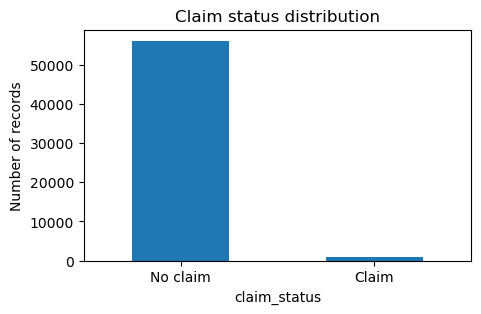

In [17]:
# Count of each class
counts = train['claim_status'].value_counts()
print(counts)

# Percentage of each class
props = train['claim_status'].value_counts(normalize=True) * 100
print(props.round(2))

# Visual check with a bar chart
plt.figure(figsize=(5,3))
counts.plot.bar()
plt.xticks([0,1], ['No claim','Claim'], rotation=0)
plt.ylabel('Number of records')
plt.title('Claim status distribution')
plt.show()

Only about 1.5% of policies result in a claim. We will need to focus on metrics that account for imbalance: precision, recall, F1-score, or AUC rather than overall accuracy.

### *Target Variable Analysis*

ADDDD STH!!!!!!!!!!!!!!!!!!

### *Explanatory Data Analysis*

For continuous or count data !!!!!!!!!!!!!!!!!!!!!!!!!!!

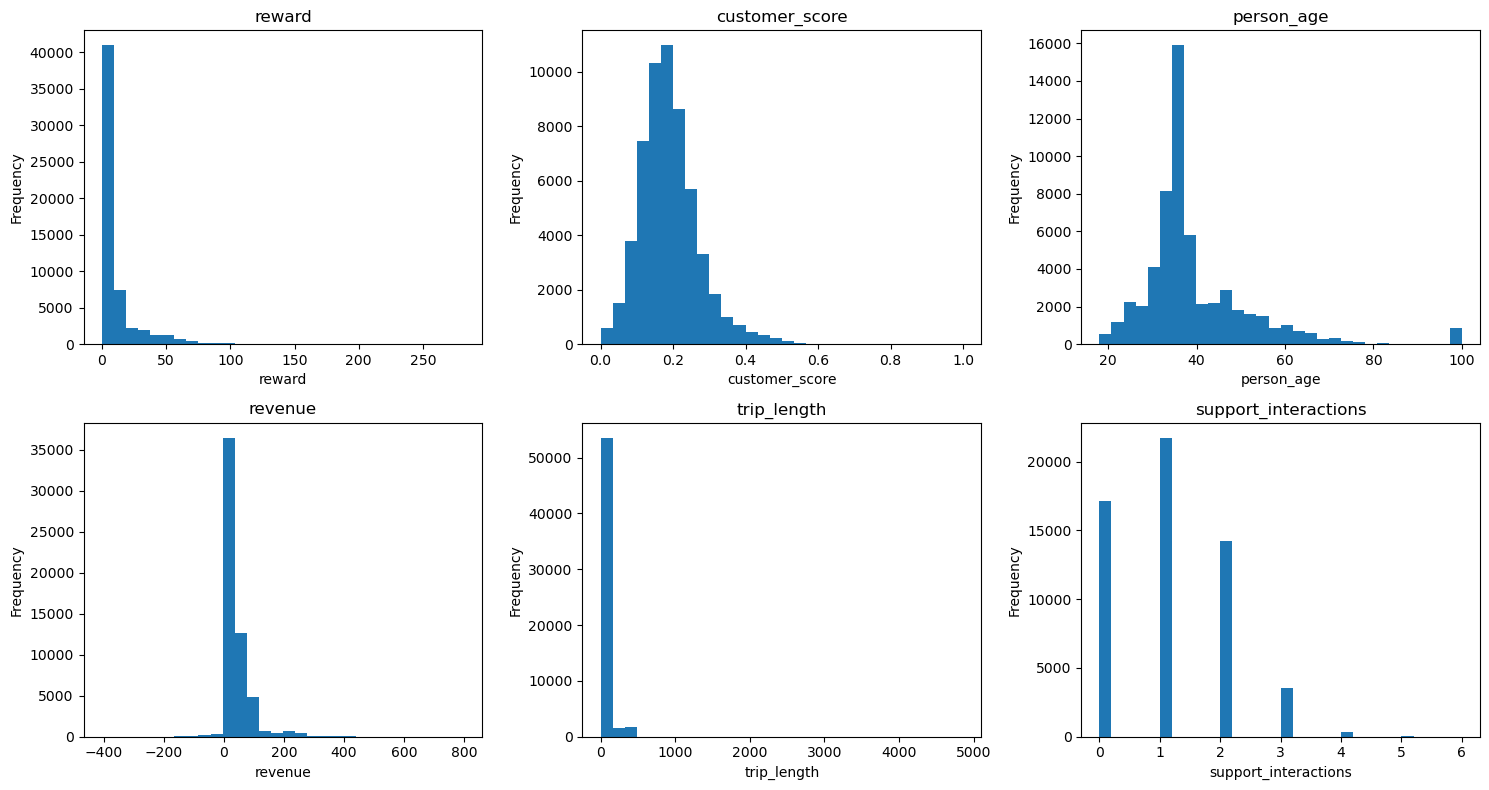

In [20]:
numeric_cols = [
    'reward',
    'customer_score',
    'person_age',
    'revenue',
    'trip_length',
    'support_interactions'
]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.hist(train[col], bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()


In [21]:
desc = train[numeric_cols].agg(['skew','kurtosis']).T
print(desc)

                           skew     kurtosis
reward                 4.031180    25.056463
customer_score         0.948414     2.186679
person_age             2.170675     6.975630
revenue                3.250450    18.530059
trip_length           22.321353  1005.194562
support_interactions   0.505827    -0.318769


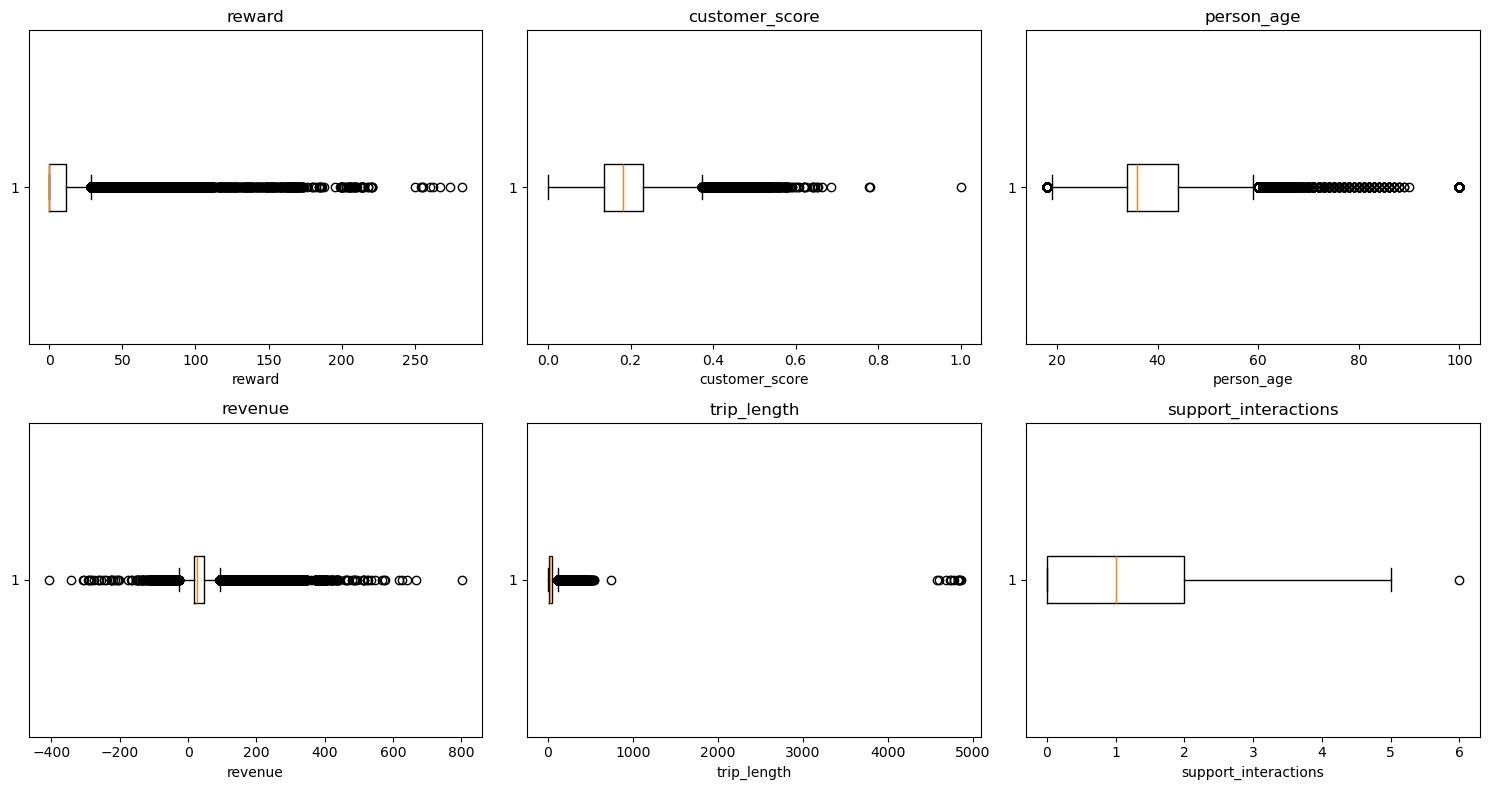

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    ax.boxplot(train[col], vert=False)
    ax.set_title(col)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

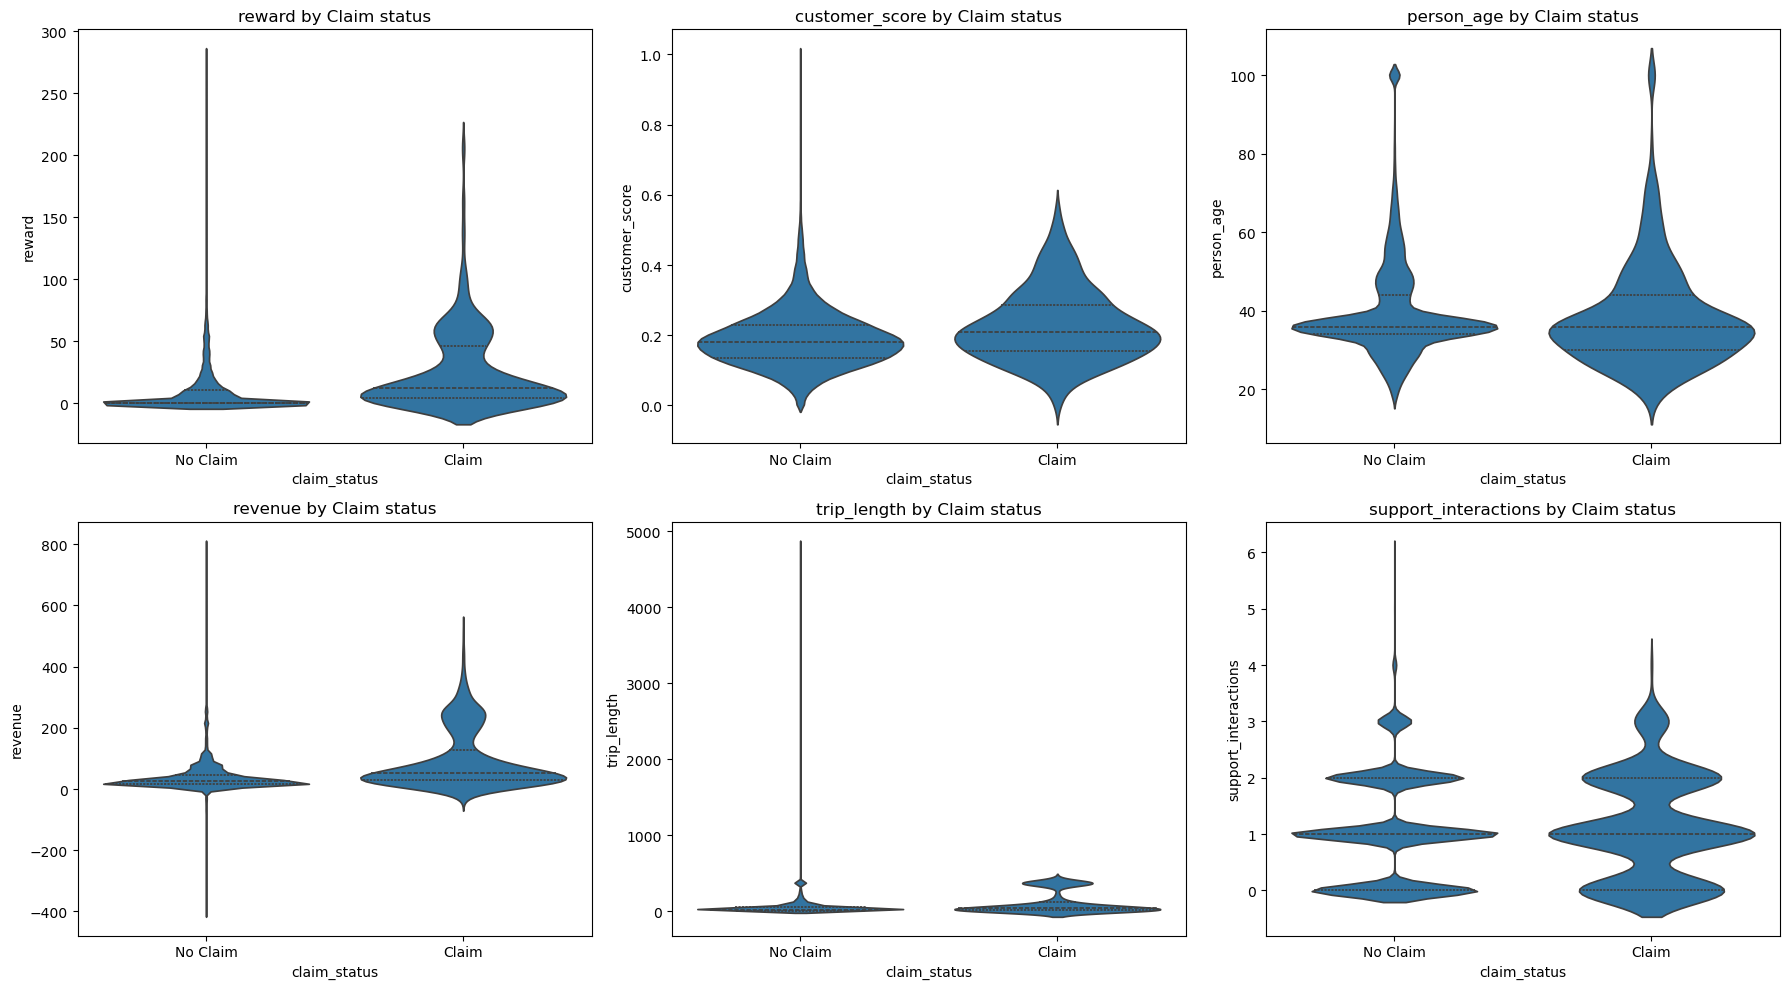

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.violinplot(
        x='claim_status',
        y=col,
        data=train,
        inner='quartile',
        density_norm='width',   # updated API
        ax=ax
    )
    # Fix ticks
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Claim','Claim'])
    ax.set_title(f'{col} by Claim status')

plt.tight_layout()
plt.show()

We can also plot KDI overlays, which show exactly where the two classes overlap or diverge on each feature. They also help to identify the specific value ranges where one class dominates.

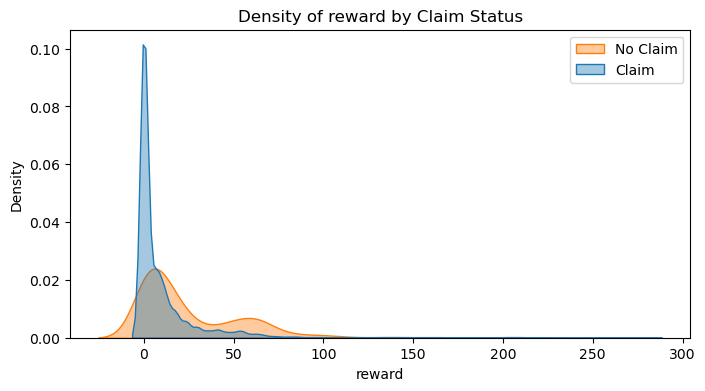

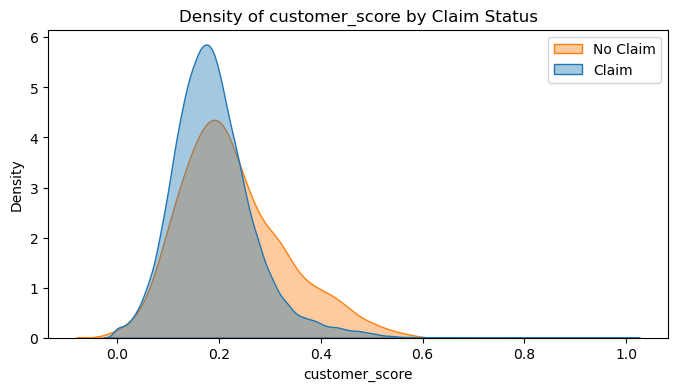

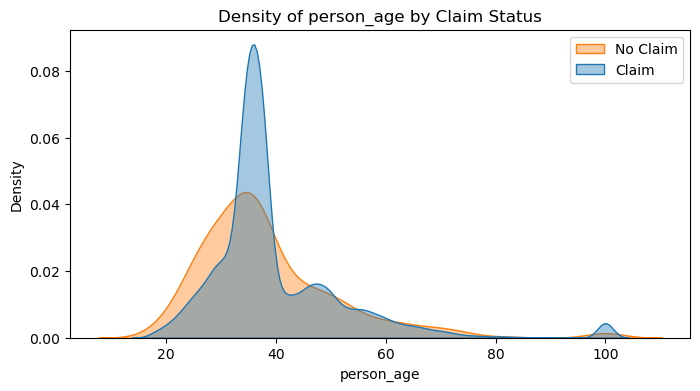

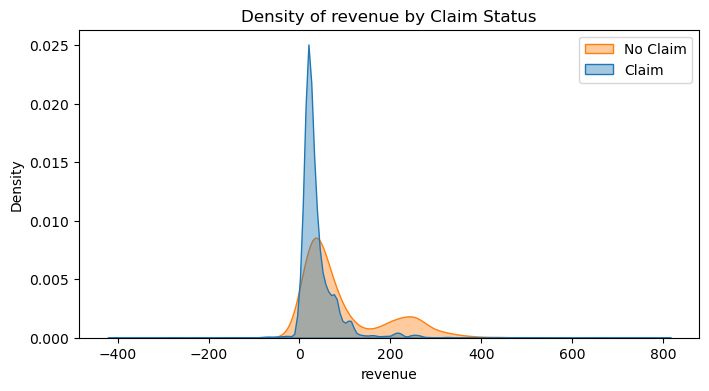

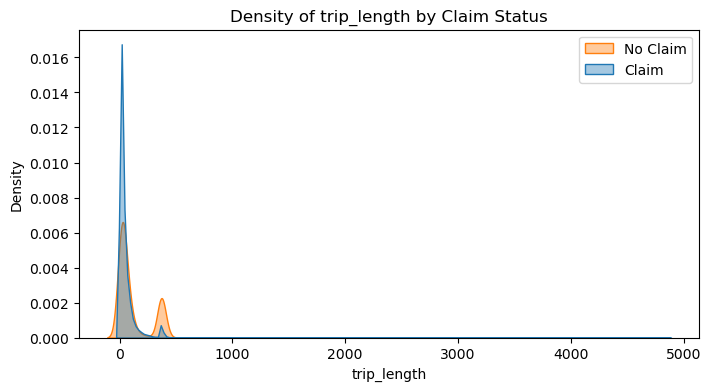

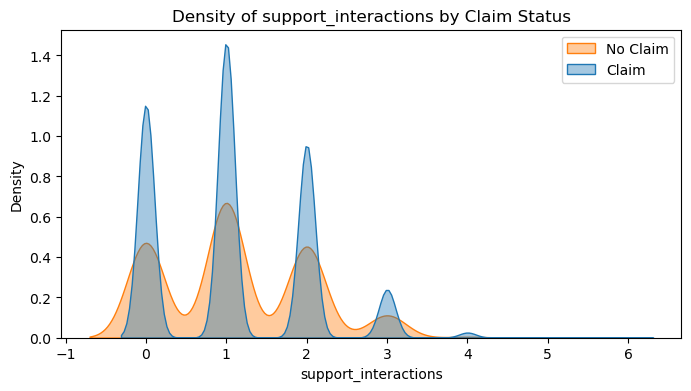

In [24]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(
        data=train,
        x=col,
        hue='claim_status',
        fill=True,
        common_norm=False,   # so each class area sums to 1
        alpha=0.4
    )
    plt.title(f'Density of {col} by Claim Status')
    plt.xlabel(col)
    plt.legend(['No Claim','Claim'])
    plt.show()

Claims concentrate in narrow value ranges - small rewards, mid-range premiums, and middle-aged policyholders while non-claims exhibit broader tails in those features. Additionally, a single support interaction and moderate customer scores are more indicative of a claim, whereas extreme trip lengths and very high scores almost never coincide with claims.

Correlation heatmap

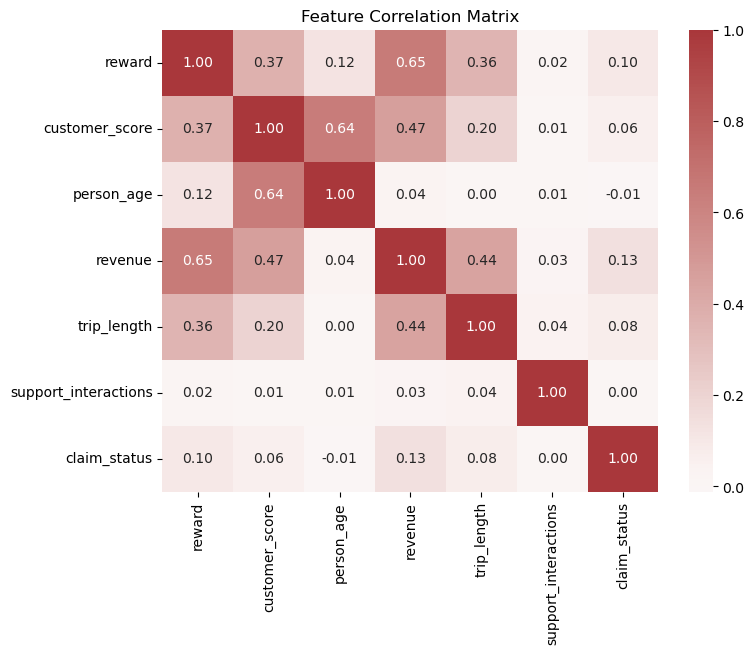

In [25]:
corr = train[['reward','customer_score','person_age','revenue','trip_length',
              'support_interactions','claim_status']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


* Customer_score correlates strongly with both person_age and revenue, suggesting older, higher-scoring customers pay more in premiums.
* All features have very weak direct correlations with claim_status, so no single numeric variable is a strong predictor of claims on its own.
* Support_interactions shows almost no correlation with any other feature or the target.

For categorical data............

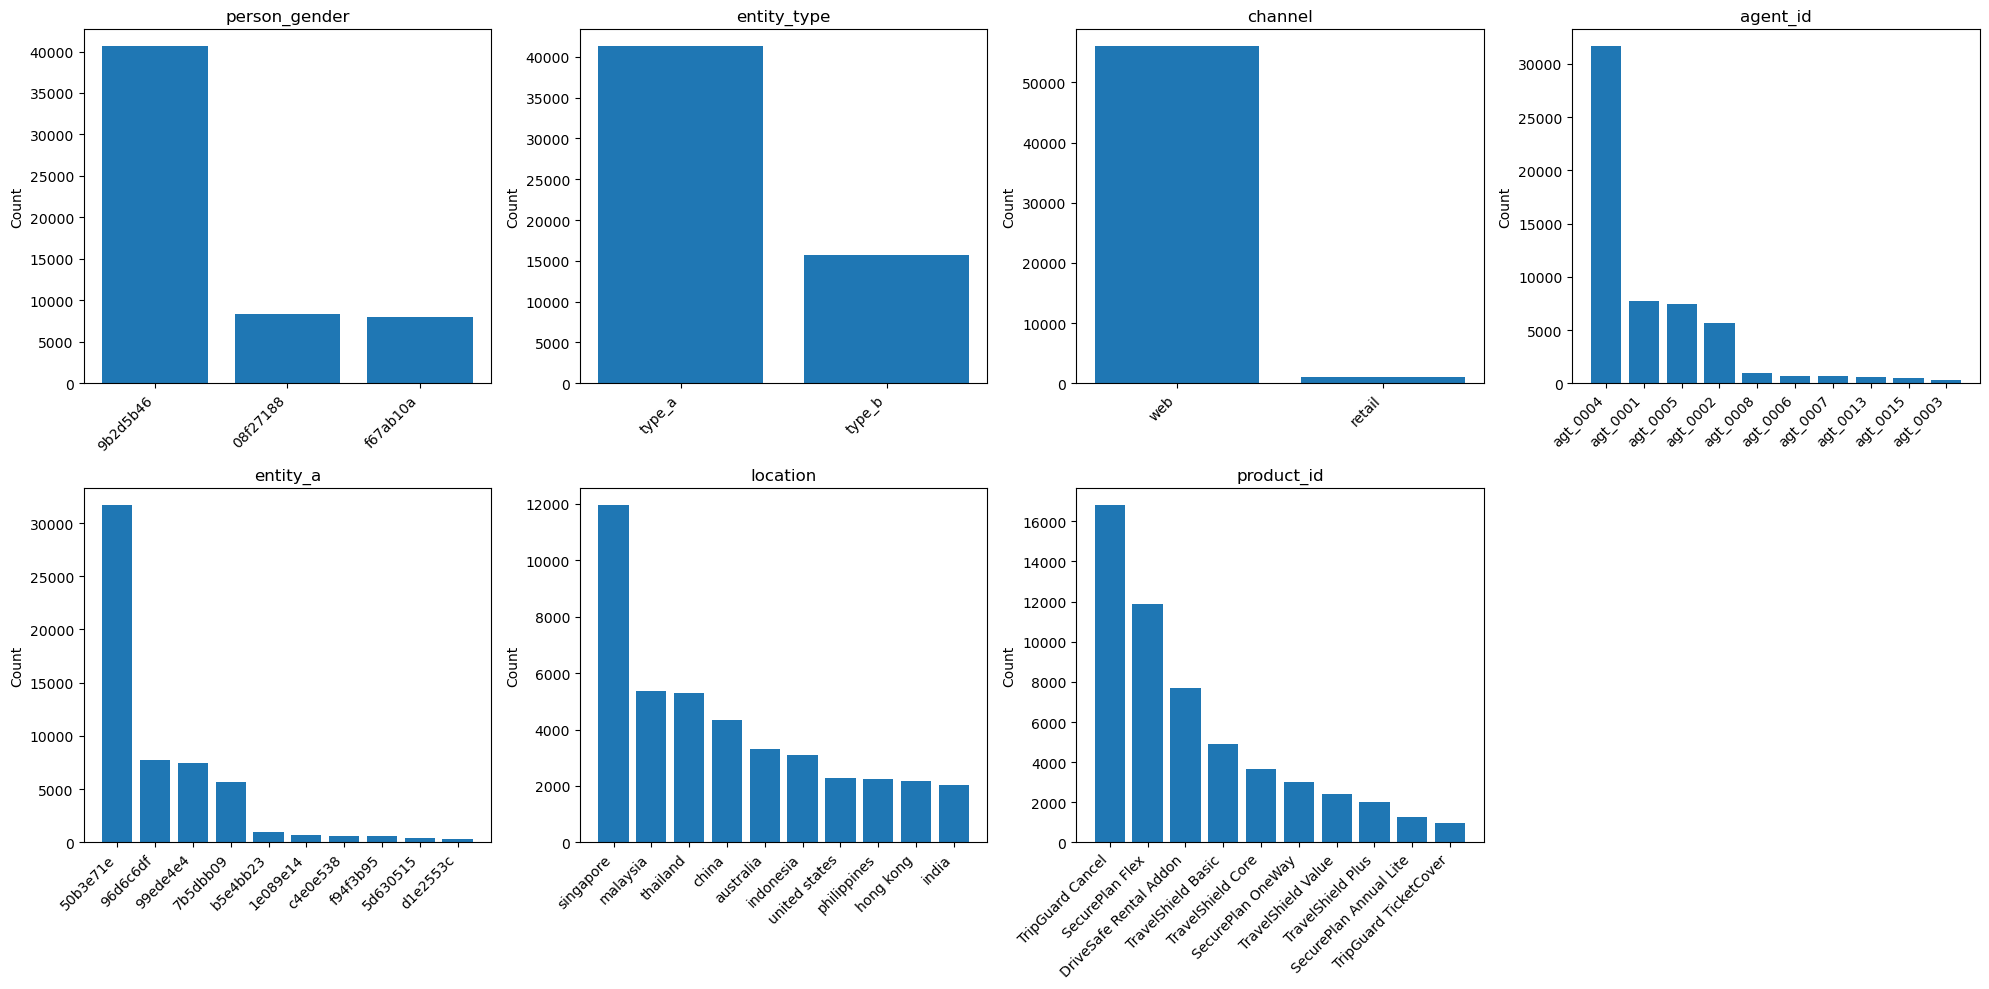

In [26]:
categorical_cols = [
    'person_gender',
    'entity_type',
    'channel',
    'agent_id',
    'entity_a',
    'location',
    'product_id'
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    counts = train[col].value_counts().head(10)
    # bar chart
    ax.bar(range(len(counts)), counts.values)
    # set both tick locations and labels
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
    ax.set_title(col)
    ax.set_ylabel('Count')

# remove the unused subplot if needed
if len(categorical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()



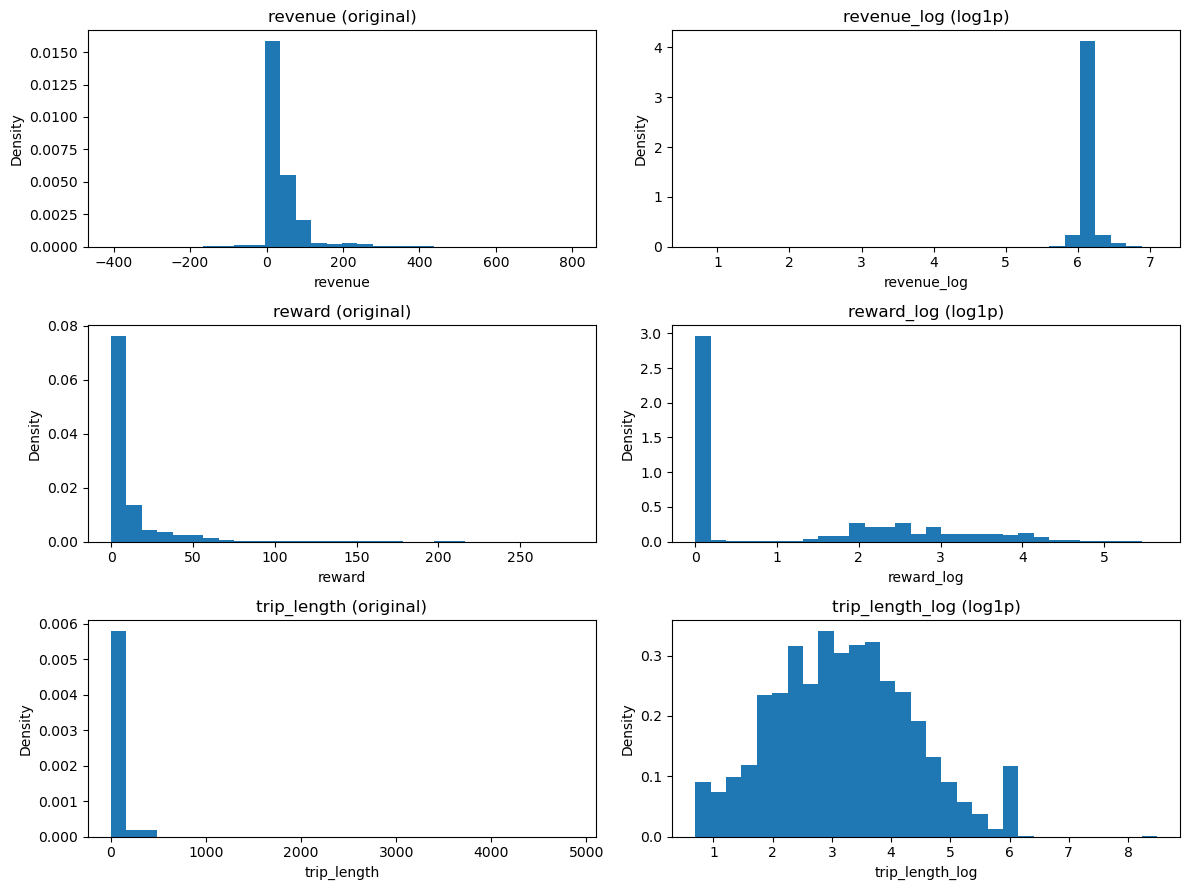

In [27]:
train['revenue_log'] = np.log1p(train['revenue'] - train['revenue'].min() + 1)
train['reward_log'] = np.log1p(train['reward'])
train['trip_length_log'] = np.log1p(train['trip_length'])

# Columns to compare
pairs = [
    ('revenue','revenue_log'),
    ('reward','reward_log'),
    ('trip_length','trip_length_log')
]

fig, axes = plt.subplots(len(pairs), 2, figsize=(12, 9))
for i, (orig, logcol) in enumerate(pairs):
    # Original
    axes[i,0].hist(train[orig], bins=30, density=True)
    axes[i,0].set_title(f'{orig} (original)')
    axes[i,0].set_xlabel(orig)
    axes[i,0].set_ylabel('Density')
    # Log-transformed
    axes[i,1].hist(train[logcol], bins=30, density=True)
    axes[i,1].set_title(f'{logcol} (log1p)')
    axes[i,1].set_xlabel(logcol)
    axes[i,1].set_ylabel('Density')

plt.tight_layout()
plt.show()

A log‐transformation compresses a highly right‐skewed variable so that large outliers are pulled in and the distribution becomes more symmetric. For this dataset, there is a need to apply log-transformation for reward, revenue, and trip_length variables. After transforming, the models will be able to learn from the bulk of the data without being distorted by rare, enormous outliers.

### *Feature Engineering*

Logistic regression

In [21]:
target = 'claim_status'
X = train.drop(columns=[target])
y = train[target]

numeric_cols     = ['reward_log','support_interactions','customer_score','person_age','revenue_log','trip_length_log']
categorical_cols = ['person_gender','entity_type','channel','entity_a','location','agent_id','product_id']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# hyper‐parameter grid
C_list        = [0.01, 0.1, 1, 10]
penalty_list  = ['l2','l1','elasticnet']
sm_k_list     = [3,5,7,10]
l1_ratio_list = [0.5]  # only used when penalty='elasticnet'

best_score  = 0
best_params = {}

for C in C_list:
    for penalty in penalty_list:
        for sm_k in sm_k_list:
            # determine valid solvers & l1_ratio
            if penalty == 'l2':
                solvers    = ['lbfgs','liblinear','saga']
                l1_ratios  = [None]
            elif penalty == 'l1':
                solvers    = ['liblinear','saga']
                l1_ratios  = [None]
            else:  # elasticnet
                solvers    = ['saga']
                l1_ratios  = l1_ratio_list

            for solver in solvers:
                for l1_ratio in l1_ratios:
                    cv_scores = []

                    # 5‐fold CV
                    for train_idx, valid_idx in skf.split(X, y):
                        X_tr, X_va = X.iloc[train_idx], X.iloc[valid_idx]
                        y_tr, y_va = y.iloc[train_idx], y.iloc[valid_idx]

                        # scale numerics
                        scaler    = StandardScaler().fit(X_tr[numeric_cols])
                        X_tr_num  = scaler.transform(X_tr[numeric_cols])
                        X_va_num  = scaler.transform(X_va[numeric_cols])

                        # one‐hot encode cats
                        ohe       = OneHotEncoder(handle_unknown='ignore', sparse_output=False) \
                                        .fit(X_tr[categorical_cols])
                        X_tr_cat  = ohe.transform(X_tr[categorical_cols])
                        X_va_cat  = ohe.transform(X_va[categorical_cols])

                        # assemble
                        X_tr_proc = np.hstack([X_tr_num, X_tr_cat])
                        X_va_proc = np.hstack([X_va_num, X_va_cat])

                        # SMOTE
                        sm        = SMOTE(k_neighbors=sm_k, random_state=42)
                        X_tr_bal, y_tr_bal = sm.fit_resample(X_tr_proc, y_tr)

                        # fit LogisticRegression
                        clf = LogisticRegression(
                            C=C,
                            penalty=penalty,
                            solver=solver,
                            l1_ratio=l1_ratio,
                            class_weight='balanced',
                            max_iter=1000,
                            random_state=42
                        )
                        clf.fit(X_tr_bal, y_tr_bal)

                        # evaluate
                        y_pred = clf.predict(X_va_proc)
                        cv_scores.append(balanced_accuracy_score(y_va, y_pred))

                    mean_score = np.mean(cv_scores)

                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {
                            'C': C,
                            'penalty': penalty,
                            'solver': solver,
                            'l1_ratio': l1_ratio,
                            'sm_k_neighbors': sm_k
                        }

print("Best CV balanced accuracy:", best_score)
print("Best hyperparameters:", best_params)


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

Best CV balanced accuracy: 0.7559003357858648
Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear', 'l1_ratio': None, 'sm_k_neighbors': 3}


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


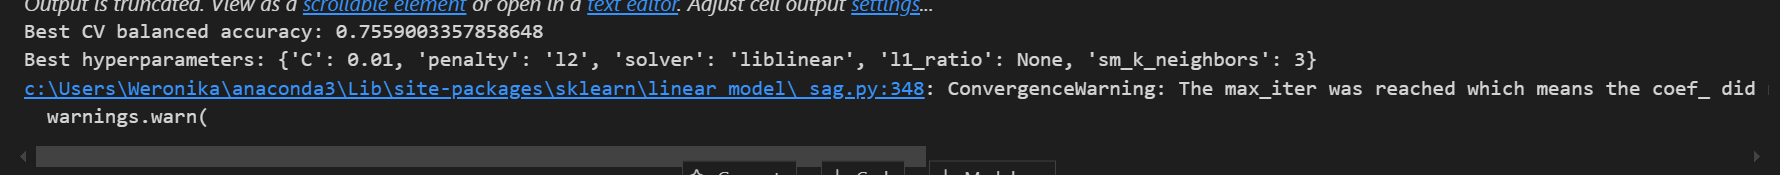

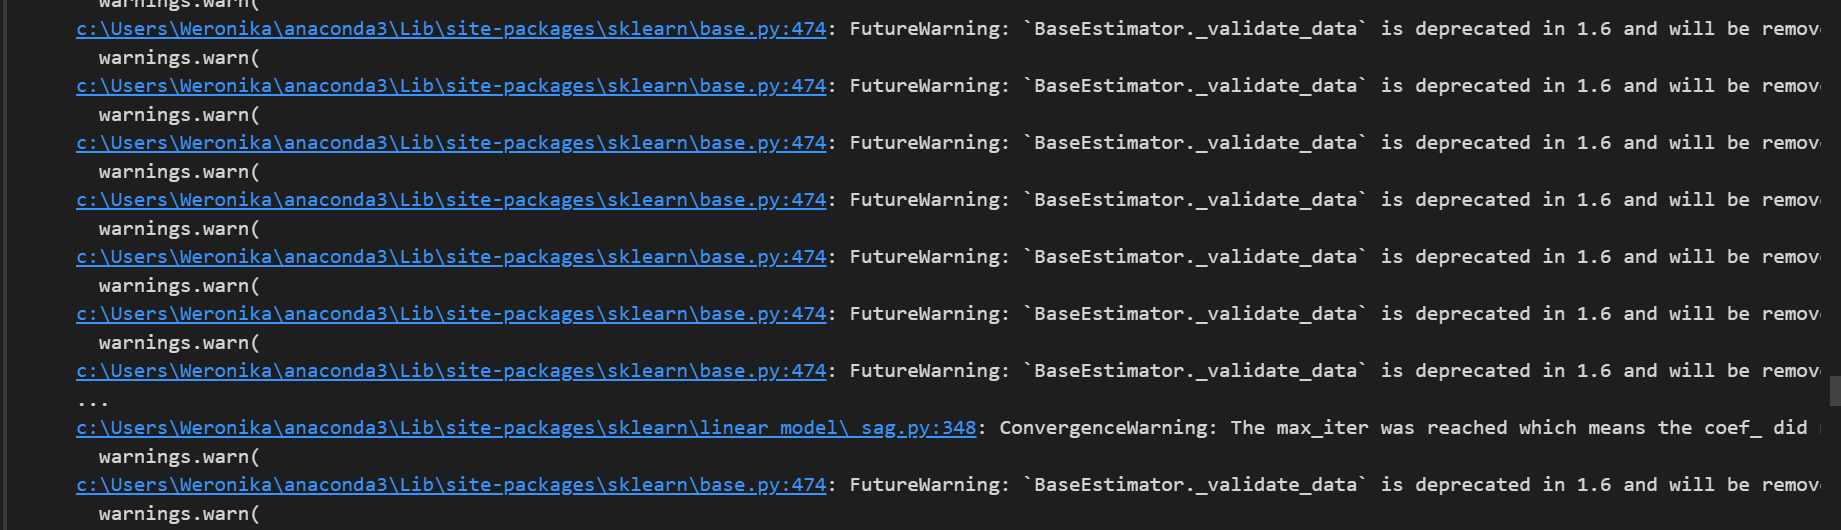

In [22]:
#target = 'claim_status'
#X = train.drop(columns=[target])
#y = train[target]

# numeric_cols = [
#   'reward',
#   'support_interactions',
#   'customer_score',
#   'person_age',
#   'revenue',
#   'trip_length'
# ]
# categorical_cols = [
#   'person_gender',
#   'entity_type',
#   'channel',
#   'entity_a',
#   'location',
#   'agent_id',
#   'product_id'
# ]


# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# scores = []

# for train_idx, valid_idx in skf.split(X, y):
#     # a) Split
#     X_tr, X_va = X.iloc[train_idx], X.iloc[valid_idx]
#     y_tr, y_va = y.iloc[train_idx], y.iloc[valid_idx]

#     # b) Scale numerics on train fold
#     scaler = StandardScaler().fit(X_tr[numeric_cols])
#     X_tr_num = scaler.transform(X_tr[numeric_cols])
#     X_va_num = scaler.transform(X_va[numeric_cols])

#     # c) One-hot encode cats on train fold
#     ohe = OneHotEncoder(handle_unknown='ignore').fit(X_tr[categorical_cols])
#     X_tr_cat = ohe.transform(X_tr[categorical_cols]).toarray()
#     X_va_cat = ohe.transform(X_va[categorical_cols]).toarray()

#     # d) Re-assemble processed arrays
#     X_tr_proc = np.hstack([X_tr_num, X_tr_cat])
#     X_va_proc = np.hstack([X_va_num, X_va_cat])

#     # e) Balance classes with SMOTE on train fold
#     sm = SMOTE(random_state=42)
#     X_tr_bal, y_tr_bal = sm.fit_resample(X_tr_proc, y_tr)

#     # f) Fit the classifier
#     clf = LogisticRegression(
#         class_weight='balanced',
#         max_iter=1000,
#         random_state=42
#     )
#     clf.fit(X_tr_bal, y_tr_bal)

#     # g) Predict & score on validation fold
#     y_pred = clf.predict(X_va_proc)
#     scores.append(balanced_accuracy_score(y_va, y_pred))

# print("CV balanced accuracy:", np.mean(scores))


KNN

In [23]:

# Define correct column lists
numeric_cols = [
    'reward_log',
    'support_interactions',
    'customer_score',
    'person_age',
    'revenue_log',
    'trip_length_log'
]
categorical_cols = [
    'person_gender',
    'entity_type',
    'channel',
    'entity_a',
    'location',
    'agent_id',
    'product_id'
]

k_list = list(range(1, 100, 2))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_score = 0
best_k = None

for k in k_list:
    fold_scores = []
    for train_idx, valid_idx in cv.split(X, y):
        # split
        X_tr, X_va = X.iloc[train_idx], X.iloc[valid_idx]
        y_tr, y_va = y.iloc[train_idx], y.iloc[valid_idx]

        # scale nums
        scaler = StandardScaler().fit(X_tr[numeric_cols])
        X_tr_num = scaler.transform(X_tr[numeric_cols])
        X_va_num = scaler.transform(X_va[numeric_cols])

        # one-hot cats
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(X_tr[categorical_cols])
        X_tr_cat = ohe.transform(X_tr[categorical_cols])
        X_va_cat = ohe.transform(X_va[categorical_cols])

        # assemble
        X_tr_proc = np.hstack([X_tr_num, X_tr_cat])
        X_va_proc = np.hstack([X_va_num, X_va_cat])

        # resample
        sm = SMOTE(random_state=42)
        X_tr_bal, y_tr_bal = sm.fit_resample(X_tr_proc, y_tr)

        # fit & eval
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(X_tr_bal, y_tr_bal)
        y_pred = knn.predict(X_va_proc)
        fold_scores.append(balanced_accuracy_score(y_va, y_pred))

    mean_score = np.mean(fold_scores)
    print(f"k={k:2d} → BA={mean_score:.4f}")
    if mean_score > best_score:
        best_score, best_k = mean_score, k

print(f"\n→ Best k = {best_k}, CV balanced accuracy = {best_score:.4f}")


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k= 1 → BA=0.5580


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k= 3 → BA=0.5756


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k= 5 → BA=0.5932


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k= 7 → BA=0.6070


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k= 9 → BA=0.6225


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=11 → BA=0.6332


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=13 → BA=0.6390


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=15 → BA=0.6461


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=17 → BA=0.6508


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=19 → BA=0.6566


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=21 → BA=0.6629


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=23 → BA=0.6643


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=25 → BA=0.6683


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=27 → BA=0.6730


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=29 → BA=0.6768


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=31 → BA=0.6886


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=33 → BA=0.6897


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=35 → BA=0.6929


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=37 → BA=0.6931


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=39 → BA=0.6942


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=41 → BA=0.6952


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=43 → BA=0.7006


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=45 → BA=0.7021


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=47 → BA=0.7030


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=49 → BA=0.7050


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=51 → BA=0.7060


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=53 → BA=0.7064


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=55 → BA=0.7095


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=57 → BA=0.7103


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=59 → BA=0.7117


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=61 → BA=0.7098


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=63 → BA=0.7103


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=65 → BA=0.7109


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=67 → BA=0.7125


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=69 → BA=0.7129


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=71 → BA=0.7137


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=73 → BA=0.7127


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=75 → BA=0.7148


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=77 → BA=0.7169


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=79 → BA=0.7182


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=81 → BA=0.7177


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=83 → BA=0.7186


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=85 → BA=0.7197


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=87 → BA=0.7190


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=89 → BA=0.7182


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=91 → BA=0.7193


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=93 → BA=0.7191


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=95 → BA=0.7204


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=97 → BA=0.7191


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: Future

k=99 → BA=0.7192

→ Best k = 95, CV balanced accuracy = 0.7204


For KNN the highest balanced_accuracy is 0.7204 for k = 95.

SVM

In [ ]:
# 4) Stack your preprocessed features
X_tr_pre = np.hstack([X_tr_num, X_tr_cat])
X_va_pre = np.hstack([X_va_num, X_va_cat])

# 5) Rebalance the training set with SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_res, y_res = smoteenn.fit_resample(X_tr_pre, y_tr)

# 6) Train the SVM (with class_weight to favor the minority)
svm = SVC(
    C=1.0, 
    kernel='rbf', 
    gamma='scale', 
    class_weight='balanced', 
    probability=True,
    random_state=42
)
svm.fit(X_res, y_res)

# 7) Evaluate on your held-out validation fold
y_pred = svm.predict(X_va_pre)
print("Balanced Accuracy:", balanced_accuracy_score(y_va, y_pred))

c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Balanced Accuracy: 0.7377423054345409


The highest balanced accuracy is for logistic regression model.

In [33]:
target = 'claim_status'
X = train.drop(columns=[target])
y = train[target]

# 1) Unpack best hyper-parameters (as you printed them)
best_params = {
    'C':             0.01,
    'penalty':       'l2',
    'solver':        'liblinear',
    'l1_ratio':      None,
    'sm_k_neighbors':3
}


numeric_cols     = ['reward_log','support_interactions','customer_score','person_age','revenue_log','trip_length_log']
categorical_cols = ['person_gender','entity_type','channel','entity_a','location','agent_id','product_id']

# 2) Fit final scalers/encoders on the full training set
scaler_final = StandardScaler().fit(X[numeric_cols])
ohe_final    = OneHotEncoder(handle_unknown='ignore', sparse_output=False) \
                   .fit(X[categorical_cols])

# 3) Preprocess ALL train data and SMOTE-resample
X_num_all    = scaler_final.transform(X[numeric_cols])
X_cat_all    = ohe_final.transform(X[categorical_cols])
X_proc_all   = np.hstack([X_num_all, X_cat_all])

X_bal, y_bal = SMOTE(k_neighbors=3, random_state=42) \
                  .fit_resample(X_proc_all, y)

# 4) Train your final LogisticRegression
clf_final = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='liblinear',
    l1_ratio=None,
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)
clf_final.fit(X_bal, y_bal)

# 5) Preprocess the test set
# Create log-transformed columns in test set (same as in train)
test = test.copy()
test['revenue_log'] = np.log1p(test['revenue'] - train['revenue'].min() + 1)
test['reward_log'] = np.log1p(test['reward'])
test['trip_length_log'] = np.log1p(test['trip_length'])

X_test_num  = scaler_final.transform(test[numeric_cols])
X_test_cat  = ohe_final.transform(test[categorical_cols])
X_test_proc = np.hstack([X_test_num, X_test_cat])

# 6) Predict
y_test_pred = clf_final.predict(X_test_proc)

# 7) Save to CSV
output = pd.DataFrame({
    'id':         test.index,       # or use test['your_id_col] if you have one
    'prediction': y_test_pred
})
output.to_csv('predictions.csv', index=False)
print("Written predictions.csv with", len(output), "rows")


c:\Users\Weronika\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Written predictions.csv with 6333 rows
